In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import spacy
from collections import Counter



In [3]:
nlp = spacy.load("en_core_web_lg")

In [5]:


# Specify the path to the normalized text file
normalized_text_path = '../artifacts/data_preparation/normalized_text.txt'  # Update this path

# Read the normalized text from the file
with open(normalized_text_path, 'r', encoding='utf-8') as file:
    normalized_text = file.read()

# Function to process text in smaller chunks
def process_text_in_chunks(text, chunk_size=1000000):
    entities = []
    for i in range(0, len(text), chunk_size):
        # Process each chunk of text
        doc = nlp(text[i:i+chunk_size])
        # Extract entities from the chunk
        entities.extend([(ent.text, ent.label_) for ent in doc.ents])
    return entities

# Assuming the max_length has been adjusted or you're processing in chunks
entities = process_text_in_chunks(normalized_text)

# Display identified entities and their labels
print("Identified entities and their labels:")
for text, label in set(entities):  # Convert to set to remove duplicates
    print(f"{text} ({label})")



Identified entities and their labels:
second year (DATE)
cutapol tisvt cutapol (PERSON)
lyle (PERSON)
solofra (ORG)
uk ireland (GPE)
november last year (DATE)
sichuan university chengdu china (ORG)
pta pfma address (ORG)
cof total head june hide (ORG)
york premire (ORG)
covington (PERSON)
martin (PERSON)
midmarch middleton (PERSON)
clariants executive committee (ORG)
pseudocationic (ORG)
scp gauducheau (PERSON)
march end february (DATE)
doubleface line footwear doubleface garment (ORG)
fructify quick kolkata state government focus development (ORG)
china da costa (ORG)
gen z consumers etsy (ORG)
ite group (ORG)
alussa simac tan tech trade (ORG)
pef (ORG)
india (GPE)
one year (DATE)
abiacav apex (ORG)
conselho administrativo de (PERSON)
brawley california (ORG)
interzum brazilian (PRODUCT)
llc (ORG)
guideprogressive maidstone roadfoots cray kent (ORG)
theacle (ORG)
ppdi prepolymers (PERSON)
zeeland oceania canada usa (ORG)
house astm (ORG)
friday (DATE)
hernandez padilla director (PERSO

In [13]:
unique_labels = list({label for _, label in entities})

# Display the list of unique labels
print(unique_labels)

['FAC', 'PRODUCT', 'LOC', 'GPE', 'MONEY', 'LAW', 'PERSON', 'PERCENT', 'LANGUAGE', 'EVENT', 'WORK_OF_ART', 'NORP', 'ORG', 'QUANTITY', 'TIME', 'DATE', 'CARDINAL', 'ORDINAL']


In [14]:


# Directly collect PRODUCT labeled entities
product_mentions = [entity[0] for entity in entities if entity[1] == 'PRODUCT']

# Collect ORG labeled entities with a simple heuristic
# This example assumes a simplistic heuristic: ORG entities with certain keywords might be products
# You would need to replace 'product_keywords' with actual domain-specific keywords
product_keywords = ['software', 'app', 'platform', 'device']  # Example heuristic keywords
org_mentions_potential_products = [entity[0] for entity in entities if entity[1] == 'ORG' and any(keyword in entity[0].lower() for keyword in product_keywords)]

# Combine and deduplicate product mentions
all_product_mentions = set(product_mentions + org_mentions_potential_products)

# Display identified product mentions
print("Identified product mentions:")
for product in all_product_mentions:
    print(product)


Identified product mentions:
interhides
audi
prizelaurell
programmetakes holistic approach
astronger
courteney
progresstowards
tyson
lectra cadcam software
crm connectors
codyeco
newquay
dystar chinas
android applestore ios
cole
zoon file european patent application
gucci
lineappelle exhibitors flock
kaeru brazilian
sil
crm
verde
honda
lowweight
epb
ngo
rosilk
cabestany
doan
apexbrasil
wetend department product development application section
meilihua
kevlar
kswiss vans timberland
holger
us house market appreciation
otb
alpina ua ninth
lvmh
koolaburra
allnew
nike
kaeru
pittards
cummins bosch br petrobras
fendi
segmentshas
bata
camry
american concrete institute association home appliance manufacturers national electrical manufacturers association
cleaningouterhavitlsc
hkcec
pph
echa
armani
appleon
evfta
kanpurunnao
mastrotto
saidwe
chrome tan
zenda
crocos
vrin
flipflops
aci application centre
cole haan johnston
american apparel footwear association
yesterdayeight
bmw
deri
higg
arleis
no

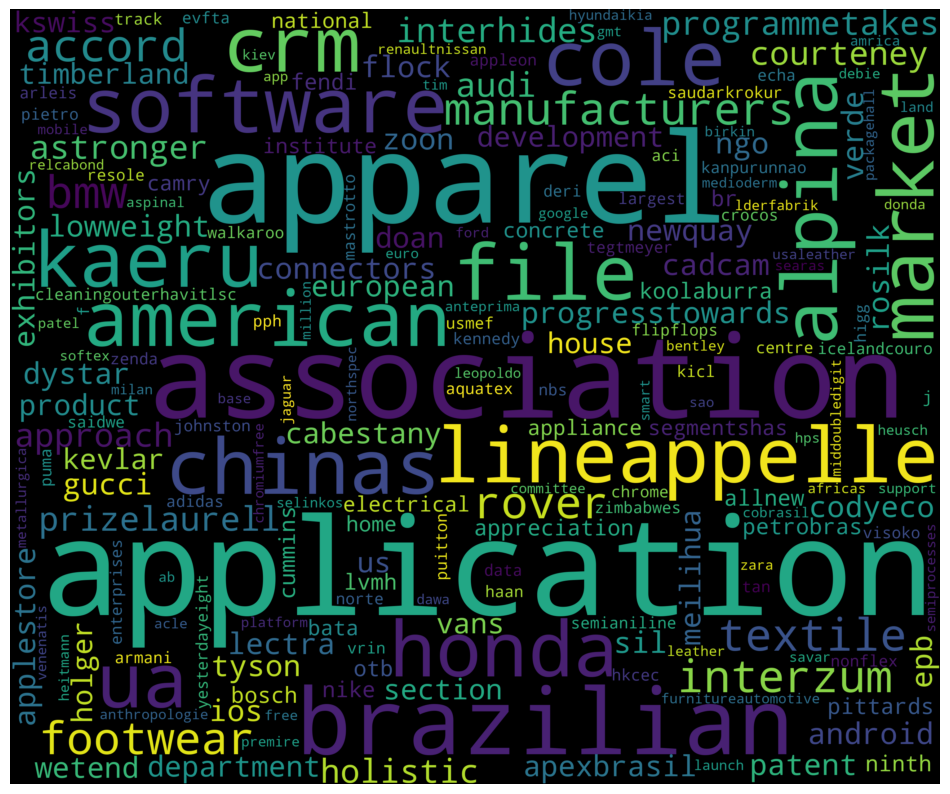

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'all_product_mentions' is your set/list of product mentions
# Convert all product mentions into a single string
all_product_mentions_text = ' '.join(all_product_mentions)

# Generate a word cloud from the combined text
wordcloud = WordCloud(background_color='black', width=3000, height=2500).generate(all_product_mentions_text)

# Plot the word cloud using matplotlib
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()


In [7]:

from collections import Counter



def process_text_in_chunks(text, chunk_size=1000000):
    product_candidates = []
    for i in range(0, len(text), chunk_size):
        doc = nlp(text[i:i+chunk_size])
        # Look for proper nouns; this could include product names
        product_candidates.extend([token.text for token in doc if token.pos_ == 'PROPN'])
    return product_candidates



# Process the text to identify product candidates
product_candidates = process_text_in_chunks(normalized_text)



# Count the occurrences of each candidate
product_counts = Counter(product_candidates)

# Display the 20 most common product candidates
for product, count in product_counts.most_common(20):
    print(f"{product}: {count}")


leather: 1218
tan: 973
china: 964
stahl: 597
president: 487
june: 442
september: 437
india: 432
july: 418
brazil: 412
ceo: 411
january: 408
new: 400
us: 395
industry: 390
italy: 381
april: 363
february: 350
march: 343
international: 335


In [9]:
len(product_counts)

10819